# **Project 2: Analysis of 2-Node Network**   
*Group members: Jacob Silver, Justin Williams, Gregg Maloy*

This analysis will utilize the 'Github Organisations' dataset available via [Kaggle](https://www.kaggle.com/datasets/anshulmehtakaggl/github-organizations-social-network-analysis).  The 'Github Organisations' dataset contains github organisations and their contributing members(developers).  "(Github) organisations are shared accounts where businesses and open-source projects can collaborate across many projects at once...".    

Social network analysis, in this example, is used to provide insight into the relationships between organisations via developers.  In brief, the dataset will be partitioned into two sets, one being organisations and the other being contributing members.  The organisation partition will be projected onto the contributor network, with each node denoting a organisation and each edge denoting a contributor(s).  Various centrality measurements will be calculated.  Finally the island method will be applied to trim the network according to organisations of highest degree centrality.  It is our hope that isolating network(s) with high measures of degree centrality will provide insight into organisational skillsets. 

**Part 1: Load Packages & Exploratory Analysis**   
For this analysis networkx and matplotlib packages were utilized.  The dataset consists of two variables 'Organisation' and 'member', with total of 10,598 contributing members (rows) with 41 different organisations.  Upon initial inspection, microsoft was the organisation with the largest number of members (41%, # members =3896).   

Number of Organisations: 41
Number of Members(rows): 10598
Number of Variables(columns): 2


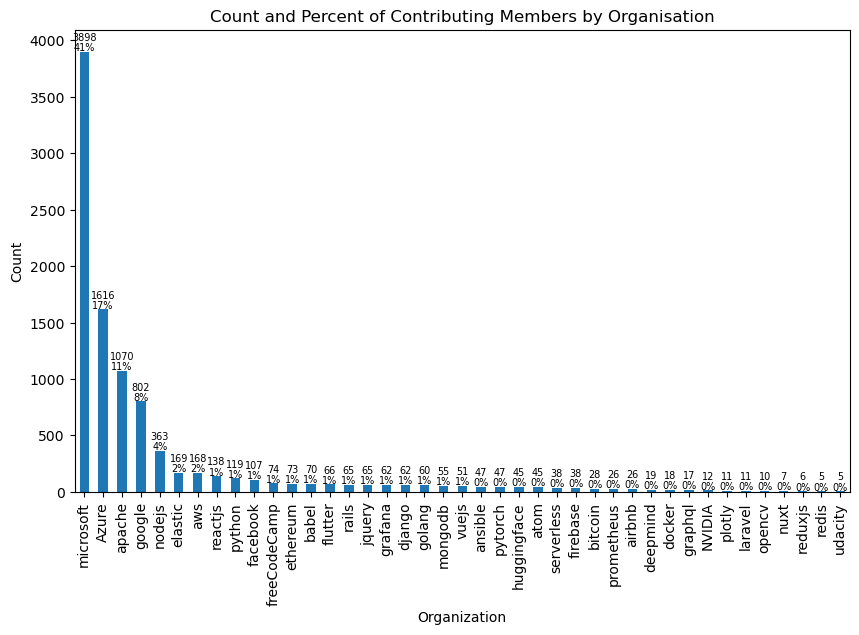

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

data= pd.read_csv('https://raw.githubusercontent.com/greggmaloy/Data620/main/DATA_620_Assignment_1.csv')


def glimpse(data):
    print(f"Number of Members(rows): {data.shape[0]}")
    print(f"Number of Variables(columns): {data.shape[1]}")
   # for col in df.columns:
   #     print(f"$ {col} <{df[col].dtype}> {df[col].head().values}")
unique_organizations = data['Organisation'].nunique()
print(f"Number of Organisations: {unique_organizations}")
glimpse(data)
data.head(5)

df_eda = pd.DataFrame({'Organisation': df['Organisation'], 'Count': 1})
grouped = df_eda.groupby(['Organisation'])['Count'].count()
#print(grouped)


# Calculate the total count
total_count = grouped.sum()

# Sort the grouped data by count in descending order
grouped_sorted = grouped.sort_values(ascending=False)

# Calculate the percentages
percentages = (grouped_sorted / total_count) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = grouped_sorted.plot(kind='bar')

# Add percentage labels to the bars
for i, v in enumerate(grouped_sorted):
    percent = round(percentages.iloc[i])
    ax.text(i, v + 10  , f'{percent}%', ha='center', fontsize=7)
    ax.text(i, v + 100, f'{v}', ha='center', fontsize=7)
    
# Set the labels and title
plt.xlabel('Organization')
plt.ylabel('Count')
plt.title('Count and Percent of Contributing Members by Organisation')

# Display the chart
plt.show()


In [151]:

# Identify the duplicate rows
duplicates = data[data.duplicated(keep=False)]

# Group duplicate rows by organisation and calculate count
df_duplicates = pd.DataFrame({'Organisation': duplicates['Organisation'], 'CountDups': 1})
grouped_dups = df_duplicates.groupby(['Organisation'])['CountDups'].count()

# Calculate the percentage of duplicate rows for each organization
total_rows = 10598
grouped_dups_percentage = (grouped_dups / total_rows) * 100

# Create a new DataFrame with count and percentage columns
df_result = pd.DataFrame({'Count of Duplicates': grouped_dups, 'Percentage': grouped_dups_percentage})
sorted_df=df_result.sort_values('Percentage',ascending=False)
print(sorted_df)

# remove duplicates
# some member names were first name only or were 'none' 
df = data[~data.duplicated(keep=False)]


def glimpse(df):
    print(f"Number of Unique Members(rows): {df.shape[0]}")
    print(f"Number of Variables(columns): {df.shape[1]}")
   # for col in df.columns:
   #     print(f"$ {col} <{df[col].dtype}> {df[col].head().values}")
unique_organizations = data['Organisation'].nunique()
print(f"Number of Organisations: {unique_organizations}")
glimpse(df)


df_eda2 = pd.DataFrame({'Organisation': df['Organisation'], 'Count': 1})
grouped2 = df_eda2.groupby(['Organisation'])['Count'].count()
df = df.merge(grouped2, on='Organisation', how='left')
#print(df)


              Count of Duplicates  Percentage
Organisation                                 
microsoft                     464    4.378185
Azure                         315    2.972259
google                         75    0.707681
apache                         53    0.500094
aws                            12    0.113229
ethereum                       11    0.103793
reactjs                         9    0.084922
nodejs                          7    0.066050
flutter                         5    0.047179
elastic                         4    0.037743
huggingface                     4    0.037743
pytorch                         4    0.037743
vuejs                           4    0.037743
firebase                        3    0.028307
facebook                        3    0.028307
golang                          3    0.028307
grafana                         2    0.018871
deepmind                        2    0.018871
bitcoin                         2    0.018871
atom                            2 

**Part 3: Partitioning the Data & Graph Visualization**   
The data was partitioned into 'Member' and 'Organisation' groups and then tested to confirm that the resulting partitions were both bi-nodal and that each node had at least one edge.  Although the dataset was confirmed to be bi-nodal, we did find some nodes which lacked edges.  These nodes will be removed during downstream analysis.  Finally the network as a whole was graphed.  The red nodes in the graph represent organisations, while the blue nodes represent contributors. The graph displays that some organisations have many more contributors than others, but the graph does not reveal much more.  We will need to trim the dataset to reveal further insights to hopefully gain further insights.  First, though, we will calculate centrality measurements.

False
True


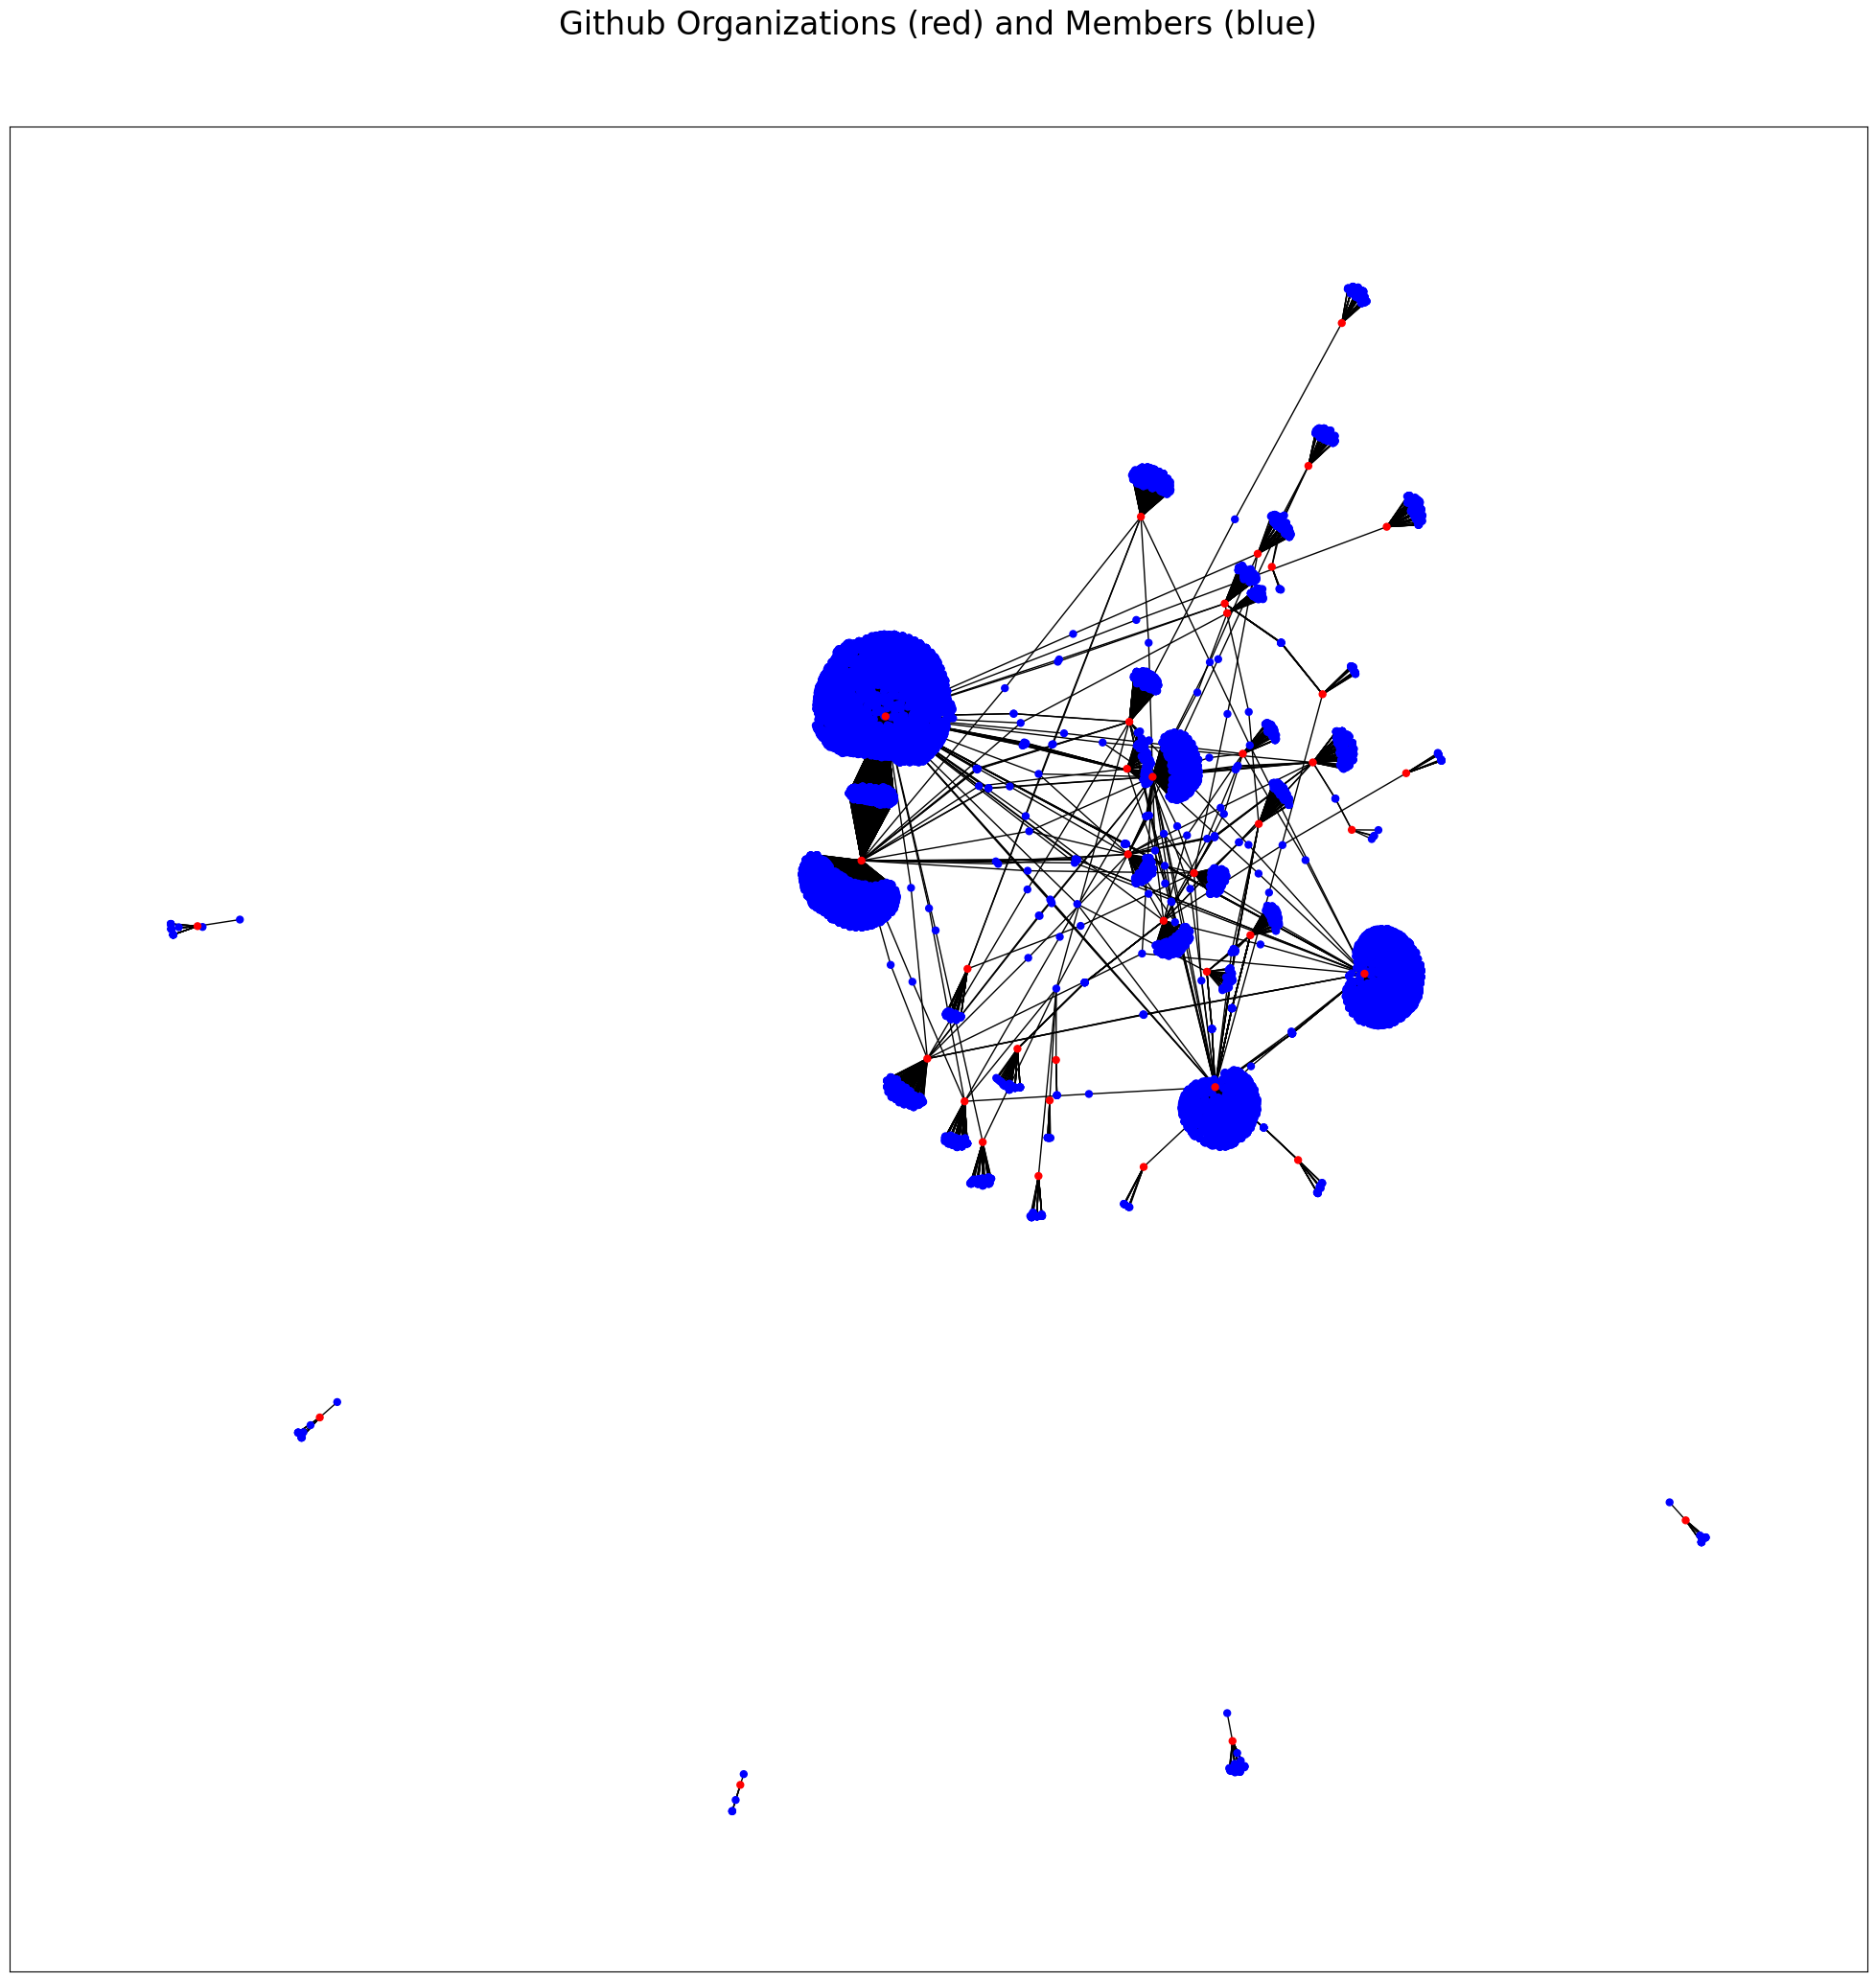

In [152]:
#Create the bipartite graph
graph = nx.Graph()


    
plt.show()
graph.add_nodes_from(df['member']      ,bipartite=1, with_labels=False)
graph.add_nodes_from(df['Organisation'],bipartite=0, with_labels=False)
#tesing data- for each node there is at least one edge
print(nx.is_connected(graph))

#Returns True if graph G is bipartite, False if not.
print(nx.is_bipartite(graph)) 
node_colors = ['blue' if node_type == 1 else 'red' for node_type in nx.get_node_attributes(graph, 'bipartite').values()]

for i in range(len(df)):
  graph.add_edges_from([(df.iloc[i,1],df.iloc[i,0])])

plt.figure(figsize=(25,25))
plt.text(0.5, 1.05, "Github Organizations (red) and Members (blue)", fontsize=24, ha='center', transform=plt.gca().transAxes)
nx.draw_networkx(graph, with_labels=False, node_size=25,node_color=node_colors)
plt.show()


   

***Part 4: Centrality Calculations***    
Below unweighted centrality scores are calculated and sorted by degree. We are more concern with degree centrality here as we are interested in identifying influencial nodes that have a large number of connections so we can discern which technologies/ organisations are important to these influencial nodes.  As such the below dataframe is sorted by degree. Other centrality measures were also calculated as extraneously.  Microsoft is the organisation with the highest measure of degree centrality.

In [153]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


#centrality calculations

W  = bipartite.projected_graph(graph, df['Organisation'])
C  = nx.closeness_centrality(W) 
B  = nx.betweenness_centrality(W) 
D  = nx.degree_centrality(W)
E  = nx.eigenvector_centrality(W)
#weighted
#W_weighted = bipartite.weighted_projected_graph(graph, merged_df['Organisation'])
#C_weighted  = nx.closeness_centrality(W2) 
#B_weighted  = nx.betweenness_centrality(W2) 
#D_weighted  = nx.degree(W2)
#E_weighted  = nx.eigenvector_centrality(W2)
#degee_cent=nx.degree_centrality(df)


data = []
for w in df['Organisation']:
    Organisation_degree = W.degree(w)
    #Organisation_degree_weighted = W_weighted (w, weight='weight')
    Closeness_value = C[w]
    #Closeness_value_weighted=C_weighted[w]
    Betweeness=B[w]
    #Betweeness_weighted=B_weighted[w]
    Degree=D[w]
    #Degree_weighted=D_weighted[w]
    Eigenvector=E[w]
    #Eigenvector_weighted=E_weighted[w]
    
    data.append((w 
                 ,Organisation_degree#,Organisation_degree_weighted
                 ,Closeness_value#, Closeness_value_weighted      
                 ,Betweeness#, Betweeness_weighted
                 ,Degree#,Degree_weighted
                 ,Eigenvector#,Eigenvector_weighted
                ))

df1 = pd.DataFrame(data, columns=["Organisation"
                                 ,"Degree"#,"Degree_Weighted"
                                 ,"Closeness"#,"Closeness Centrality Weighted"
                                 ,"Betweeness"#,"Betweenness Centrality Weighted"
                                 ,"Degree_Cent"#,"Degree Centrality Weighted"
                                 ,"Eigenvector"#,"Eigenvector_weighted"
                                ]
                                )

#print(df1.to_string(index=False))

#final_df = merged_df.merge(df1, on=['Organisation','member'], how='left')


final_df = df[['Count','Organisation']].merge(df1, on='Organisation', how='left')
final_df = final_df[[ 'Organisation'
                     , 'Degree'
                     , 'Count'#,'Degree_Weighted'
                     , 'Closeness'#,'Closeness Centrality Weighted'
                     , 'Betweeness'#,'Betweenness Centrality Weighted'
                     , "Degree_Cent"#,'Degree Centrality Weighted'
                     ,'Eigenvector']]#,'Eigenvector_weighted']]
final_df = final_df.drop_duplicates()
sorted_df1 = final_df.sort_values(by='Degree', ascending=False)
print(sorted_df1.to_string(index=False))

Organisation  Degree  Count  Closeness  Betweeness  Degree_Cent  Eigenvector
   microsoft      18   3898   0.567130    0.186981        0.450 3.525066e-01
       babel      16     70   0.556818    0.173644        0.400 3.465295e-01
      nodejs      14    363   0.528017    0.067474        0.350 3.046721e-01
      python      14    119   0.502049    0.098262        0.350 2.971577e-01
      google      13    802   0.502049    0.142701        0.325 2.537615e-01
      apache      11   1070   0.486111    0.073070        0.275 2.467712e-01
       Azure      11   1616   0.464015    0.028991        0.275 2.671528e-01
freeCodeCamp      10     74   0.464015    0.018431        0.250 2.614398e-01
      jquery       8     65   0.443841    0.041638        0.200 1.826265e-01
    facebook       8    107   0.443841    0.089103        0.200 1.693380e-01
     mongodb       7     55   0.419521    0.004150        0.175 1.817362e-01
        atom       6     45   0.431338    0.003329        0.150 1.712340e-01

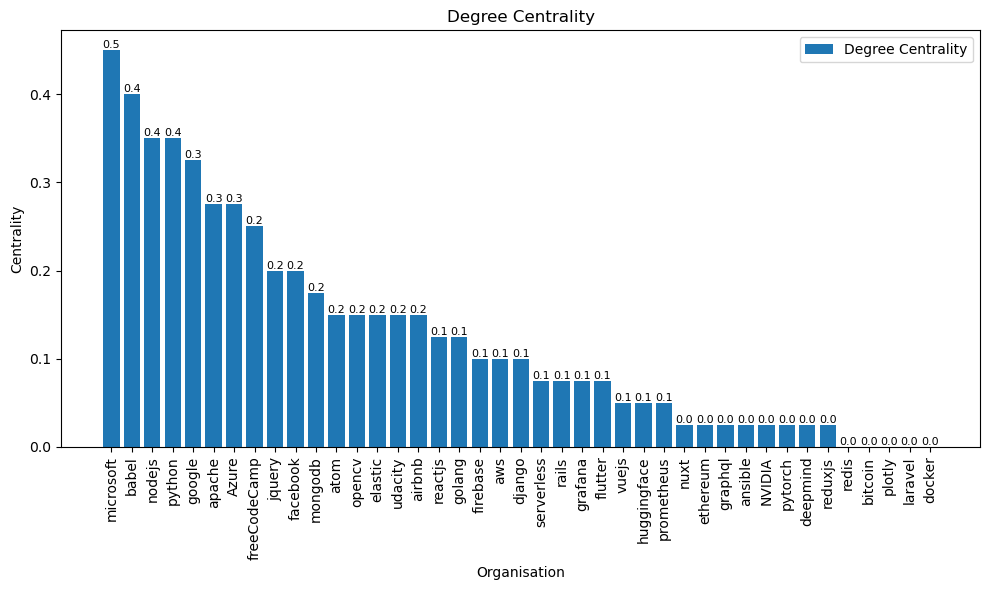

In [154]:
# Create a figure and axis objects with a larger width
fig, ax = plt.subplots(figsize=(10, 6))

# Define the labels and positions for the bars
labels = sorted_df1['Organisation']
positions = range(len(labels))

# Plot degree centrality
bars = ax.bar(positions, sorted_df1['Degree_Cent'], label='Degree Centrality')

# Set x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=90)

# Add the value labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Set labels and title
ax.set_xlabel('Organisation')
ax.set_ylabel('Centrality')
ax.set_title('Degree Centrality')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()






***Part 5: Island Method***    
The island method was then applied in order to trim the dataset to the relationships of interest.  Here we applied the island methodology on the 'degree' calculation, starting with water level 1 degree, which will trim the dataset of nodes with no edges, leaving only a interconnected main network.  Next we raised the water level to degrees 6, 9, 14, 16 and 18.  In the below graphs, the nodes, denoted in red, are organizations and the edges are contributing members of each organisation. 

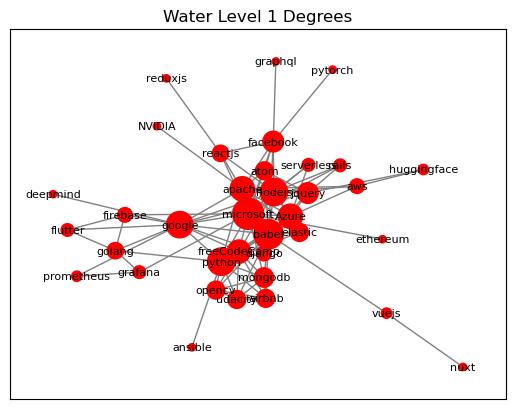

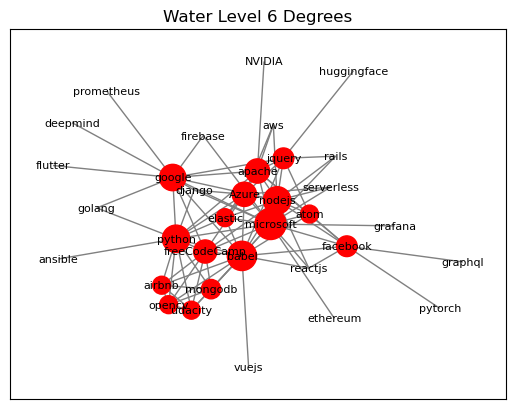

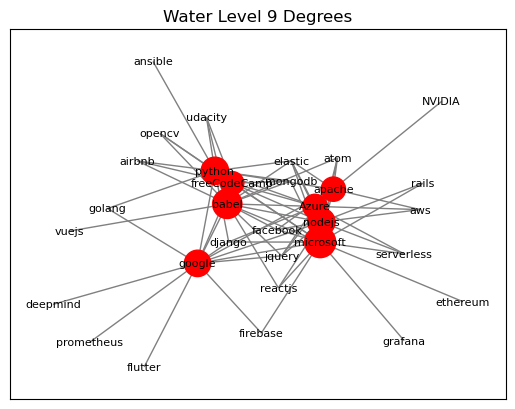

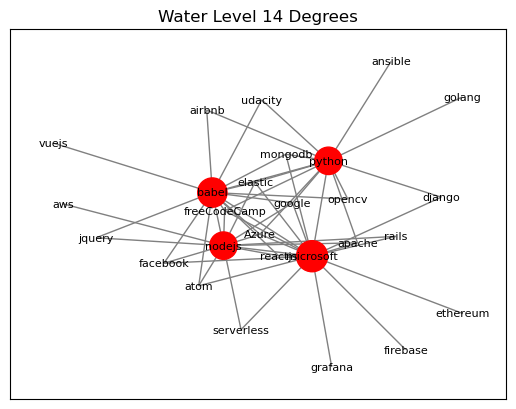

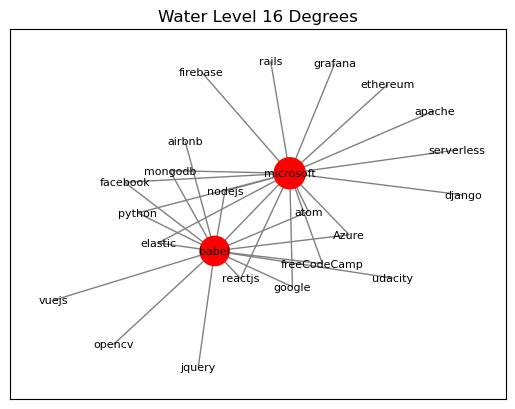

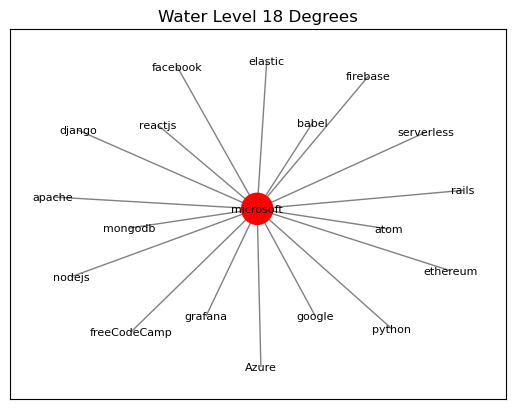

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

def plot_water_level(graph, df, water_level):
    greater_than = df.loc[df['Degree'] >= water_level]
    W = bipartite.projected_graph(graph, greater_than['Organisation'])
    
    islands = []
    visited = set()
    for node in greater_than['Organisation']:
        if node not in visited:
            island = nx.node_connected_component(W, node)
            islands.append(island)
            visited.update(island)
    
    level_graph = nx.Graph()
    for island in islands:
        level_graph.add_edges_from(W.subgraph(island).edges())
    
    pos = nx.spring_layout(level_graph)
    
    degree_centrality_values = greater_than.set_index('Organisation')['Degree_Cent']
    max_degree = np.max(degree_centrality_values.values)
    node_sizes = [degree_centrality_values.get(node, 0) / max_degree * 500 for node in level_graph.nodes]
    
    plt.figure()
    nx.draw_networkx(level_graph,
                     pos,
                     with_labels=True,
                     node_color='red',
                     node_size=node_sizes,
                     edge_color='gray',
                     font_size=8)
    plt.title(f"Water Level {water_level} Degrees")
    plt.show()

# Example usage
plot_water_level(graph, sorted_df1, 1)
plot_water_level(graph, sorted_df1, 6)
plot_water_level(graph, sorted_df1, 9)
plot_water_level(graph, sorted_df1, 14)
plot_water_level(graph, sorted_df1, 16)
plot_water_level(graph, sorted_df1, 18)

***Part 6: Island Method Commentary***   
Raising the water level to 16 or greater degrees of centrality displays that babel and microsoft contributors belong to 11 common organisations.   Of note, babel has a high degree centricity compared with other organisations in the dataset, but a very low number of contributing memebers compared to microsoft (babel degree centricity=0.4 vs microsoft degree centricity=0.5 ; # babel members=70 vs # microsoft members =3898 ). 

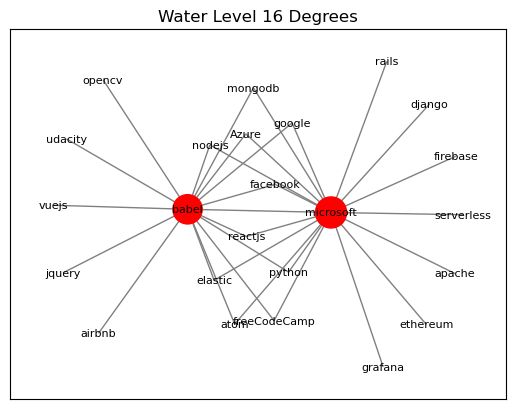

In [148]:
plot_water_level(graph, sorted_df1, 16)

The final water level of 18 degrees reveals the microsoft organisation network and organisations that share the same contributing members.  It looks like developers in the github microsoft organisation are also contribute to 18 other organisations, including ethereum, python, facebook, babel, azure.  This information could be used to develop a skill set of Microsfot organisation developers.

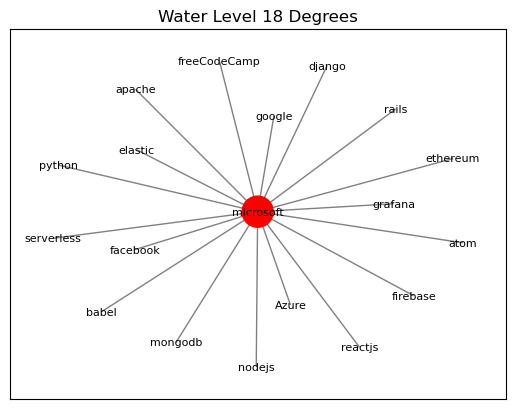

In [149]:
plot_water_level(graph, sorted_df1, 18)

***Part 7: Conclusion***   
Microsoft was the most connected organisation in the dataset, with members belonging to 18 other organisations.  This is no surprise since 41% of the dataset belonged to the microsoft organisation.  Still, it is interesting to view the other organisations which Microsoft members belong to, ie Ethereum.  This information could be viewed as a first step in developing an analysis which would create a skill set profile of the microsoft organisation developers. Such information could be useful from a recruiting perspective.  Future analysis could incorporate the use of weighted edges in order to provide further insight into the significance of the interconnectivity of these organisations and thus develop a more accurate developer profile.